# Lending Club Case Study

Team Members: Sneha Bajaj & 
              Varun Mohite
              
Problem Statement:
The Lending Club company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 

Problem Solving Approach:
Exploratory Data Analysis on the various key performance indicators (KPIs) to find out driver variables behind loan default and generate insights and recommendations which will help Lending Club for its portfolio and risk assessment.


Data Information:
1) Historical data containing the loan details for all loans issued.

2) The data contains 111 columns and 39717 rows.

3) The primary attribute in data is ‘loan_status’ which has  3 distinct data values: 

            Fully-Paid: Signifies customers who have successfully repaid their loans. 
            
            Charged-Off: Indicates customers who have been labeled as "Charged-Off" or have defaulted on their loans. 
            
            Current: Represents customers whose loans are presently in progress and,thus,cannot provide conclusive evidence regarding future defaults. 
            
Note : For the purposes of this case study, rows with a "Current" status will be excluded from the analysis.

Steps of Analysis:
The data analysis consists four main parts:

1)  Data understanding

2)  Data cleaning and pre-processing (remove columns and rows with missing values where they cannot be imputed,removing duplicates,removing columns with single unique value,removing columns which are irrelevant for analysis,outlier treatment,conversion of data type of columns as required,creating derived variables as required,creating bins, outlier treatment of numerical data,standardizing values)

3)  Data Analysis (Univariate Analysis,Bivariate Analysis & Multivariate Analysis)

4)  Recommendations


### Import required libraries

In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

### Load dataset from csv

In [288]:
loan_data = pd.read_csv("C:\\Users\\sneha.bajaj\\Downloads\loan.csv")

In [289]:
# Looking at the top 5 rows to understand data and setting the option to display all the columns in the view
loan_data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  11-Dec   Fully Paid          n   
1     30000.0     Source Verified  11-Dec  Charged Off          n   
2     12252.0        Not Verified  11-Dec   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2            1-Nov               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1008.710000          1008.71   
2                   f        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       15-Jan           171.62          NaN   
1                     1.11       13-Apr           119.66          NaN   
2                     0.00       14-Jun           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             16-May                         0.0                          NaN   
1             13-Sep                         0.0                          NaN   
2             16-May                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   
1            1       INDIVIDUAL               NaN        NaN   
2            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   
1                        NaN               0           NaN          NaN   
2                        NaN              

### Data understanding

In [290]:
# View Shape of data  i.e count of rows and columns in the data
loan_data.shape

(39717, 111)

The data has 39717 rows and 111 columns 

In [291]:
#Checking for duplicated rows in data 
loan_data[loan_data.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

No duplicates present in the data

In [292]:
#Information about data types of each column
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [293]:
#List of all the column names with the percentage of missing values information in each columns sort by percentage
round(loan_data.isnull().sum(axis = 0)/len(loan_data), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


Observations: It is observed that there are many columns which has 100% missing values in the data and they are dropped.Also columns above 30% missing data are dropped from the analysis. 

### Data Cleaning

In [294]:
#Delete columns with all values null i.e. 100% NaN values
loan_df_clean = loan_data.dropna(how='all', axis=1)
loan_df_clean.shape

(39717, 57)

Obesrvation: 54 columns out of total 111 have all null values and they are dropped,so 57 columns remains

In [295]:
# Delete columns with 30%  and above NaN values
cols = pd.DataFrame(data = round(loan_df_clean.isnull().sum(axis = 0)/len(loan_df_clean), 2)*100, columns = ['null_percent'])
loan_df_clean.drop(labels = cols[cols.null_percent >= 30].index, axis = 1, inplace = True)
loan_df_clean.shape

(39717, 53)

In [296]:
# count of unique values in each column
print(loan_df_clean.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19614
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

Observation: Many columns have only 1 unique value in them they are not reuired for analysis hence they are dropped

In [297]:
# Remove columns with 1 unique values in their coulmns
nunique = loan_df_clean.nunique()
cols_to_drop = nunique[nunique == 1].index
loan_df_clean = loan_df_clean.drop(cols_to_drop, axis=1)
loan_df_clean.shape

(39717, 44)

Observation: 9 columns had 1 unique value throughout the columns and on dropping them 44 columns remains

In [298]:
#Removing columns which are not required for the analysis as they are random variables anre not significant for analysis
loan_df_clean = loan_df_clean.drop(['id','member_id','title','emp_title','url'],axis=1)
loan_df_clean.shape

(39717, 39)

In [299]:
#Removing zip_code as it is a masked data and contains only 3 digits and cannot be used as input for the analysis
loan_df_clean = loan_df_clean.drop(['zip_code'],axis=1)

In [300]:
#Rechecking Count of missing values in each column
round(loan_df_clean.isnull().sum(axis = 0)/len(loan_data), 2)*100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

In [301]:
# Dropping columns which are not required for analysis as per as they cannot be used as driving variables for loan defaults per their details available in the data dictionary

loan_df_clean=loan_df_clean.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','revol_bal','revol_util','total_acc','out_prncp',
              'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
              'total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
              'last_credit_pull_d'],axis=1)
loan_df_clean.shape

(39717, 19)

### Data Pre-Processing

Pre-Processing details:
1. Removing % sign from int_rate column to convert it from object to float
2. Replacing 10+ years with 10 years and < 1 year with 0 year in emp_length column as per data dictionary

3. Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some    source of income which is verified
4. Dropping record NONE from home_ownership as only 3 values of NONE are present in the data which is insignificant 
5. Filtering only Fully Paid and Charged-Off and dropping records which has Current as loan_status
6. Removing rows with Null Values in emp_lenghth & pub_rec_bankruptcies columns as they cannot be imputed.
7. Change the format of issue_d from object to datetime.

In [302]:
#Information about data types of each column
loan_df_clean.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

In [303]:
processed_loan_df = loan_df_clean.copy() # Make a copy of dataframe for further processing

In [304]:
# 1.'Remove % sign to convert character to float
processed_loan_df['int_rate'] = processed_loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [305]:
# 2. Replacing 10+ years with 10 years and < 1 year with 0 year in emp_length column as per data dictionary
processed_loan_df.emp_length.replace('< 1 year', '0 year', inplace = True)
processed_loan_df.emp_length.replace('10+ years', '10 years', inplace = True)

In [306]:
# 3. Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some source of income which is verified
processed_loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [307]:
# 4. Dropping record NONE from home_ownership as only 3 values of NONE are present in the data which is insignificant 
processed_loan_df = processed_loan_df[loan_data.home_ownership != 'NONE']
processed_loan_df.shape

(39714, 19)

3 rows are dropped which had 'NONE' value in home_ownership column

In [308]:
# 5. Filtering only fully paid or charged-off as we dont need the loan records which has Current as status for analysis
processed_loan_df = processed_loan_df[processed_loan_df['loan_status'] != 'Current']
processed_loan_df.shape

(38574, 19)

1140 rows are drooped which has loan_status value as 'Current'

In [309]:
# 6. Missing Value Treatment
# Dropping records with missing value in the emp_length column as this information cannot be imputed.
processed_loan_df = processed_loan_df[~processed_loan_df['emp_length'].isnull()]
processed_loan_df.shape

(37541, 19)

1033 rows are dropped which has emp_length as Nan after dropping home_ownership = 'None' and 'loan_status' = 'Current

In [310]:
# Dropping records with missing value in the pub_rec_bankruptcies column as this information cannot be imputed.
processed_loan_df = processed_loan_df[~processed_loan_df['pub_rec_bankruptcies'].isnull()]
processed_loan_df.shape

(36847, 19)

694 rows are dropped which has pub_rec_bankruptcies as Nan after dropping home_ownership = 'None','loan_status' = 'Current & emp_length = Nan

In [313]:
from datetime import datetime as dt
processed_loan_df['issue_d'] = pd.to_datetime(loan_df_clean['issue_d'], format="%d-%b")
processed_loan_df['issue_d'] = pd.to_datetime(processed_loan_df['issue_d'])
processed_loan_df["issue_d"] = processed_loan_df["issue_d"].apply(lambda x: x.replace(year = dt.now().year))

In [314]:
#Information about data types of each column
processed_loan_df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec                          int64
pub_rec_bankruptcies           float64
dtype: object

In [315]:
#Rechecking Count of missing values in each column
round(processed_loan_df.isnull().sum(axis = 0)/len(processed_loan_df), 2)*100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
dtype: float64

None of the columns in the pre-processed data set has Null values

### Univariate Analysis

###### Categorical Variables:
term,
grade,
sub_grade,
emp_length
home_ownership,
verfication_status,
purpose,
addr_state,
loan_status

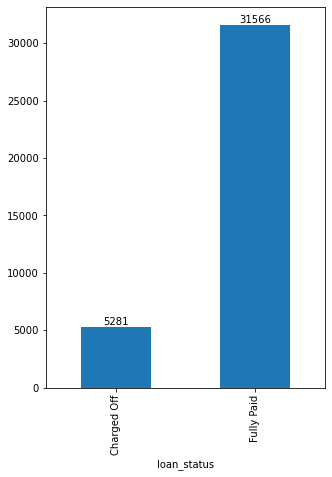

In [316]:
#Plot loan status column with the count
plt.figure(figsize=(5,7))
ax = processed_loan_df.groupby('loan_status').loan_status.count().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

In [317]:
print("%.2f" % (processed_loan_df.loc[processed_loan_df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(processed_loan_df)))

14.33


Approximately 14% of loans in the dataset are defaulted.

In [318]:
# Function to plot distribution  of  all categorical variables (purpose, term, grade, sub grade, verification status,
#emp_length,home_ownership,addr_state)

def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_status.count().plot.bar(color=sns.color_palette('husl', 16))
        ax.bar_label(ax.containers[0])

    plt.tight_layout()

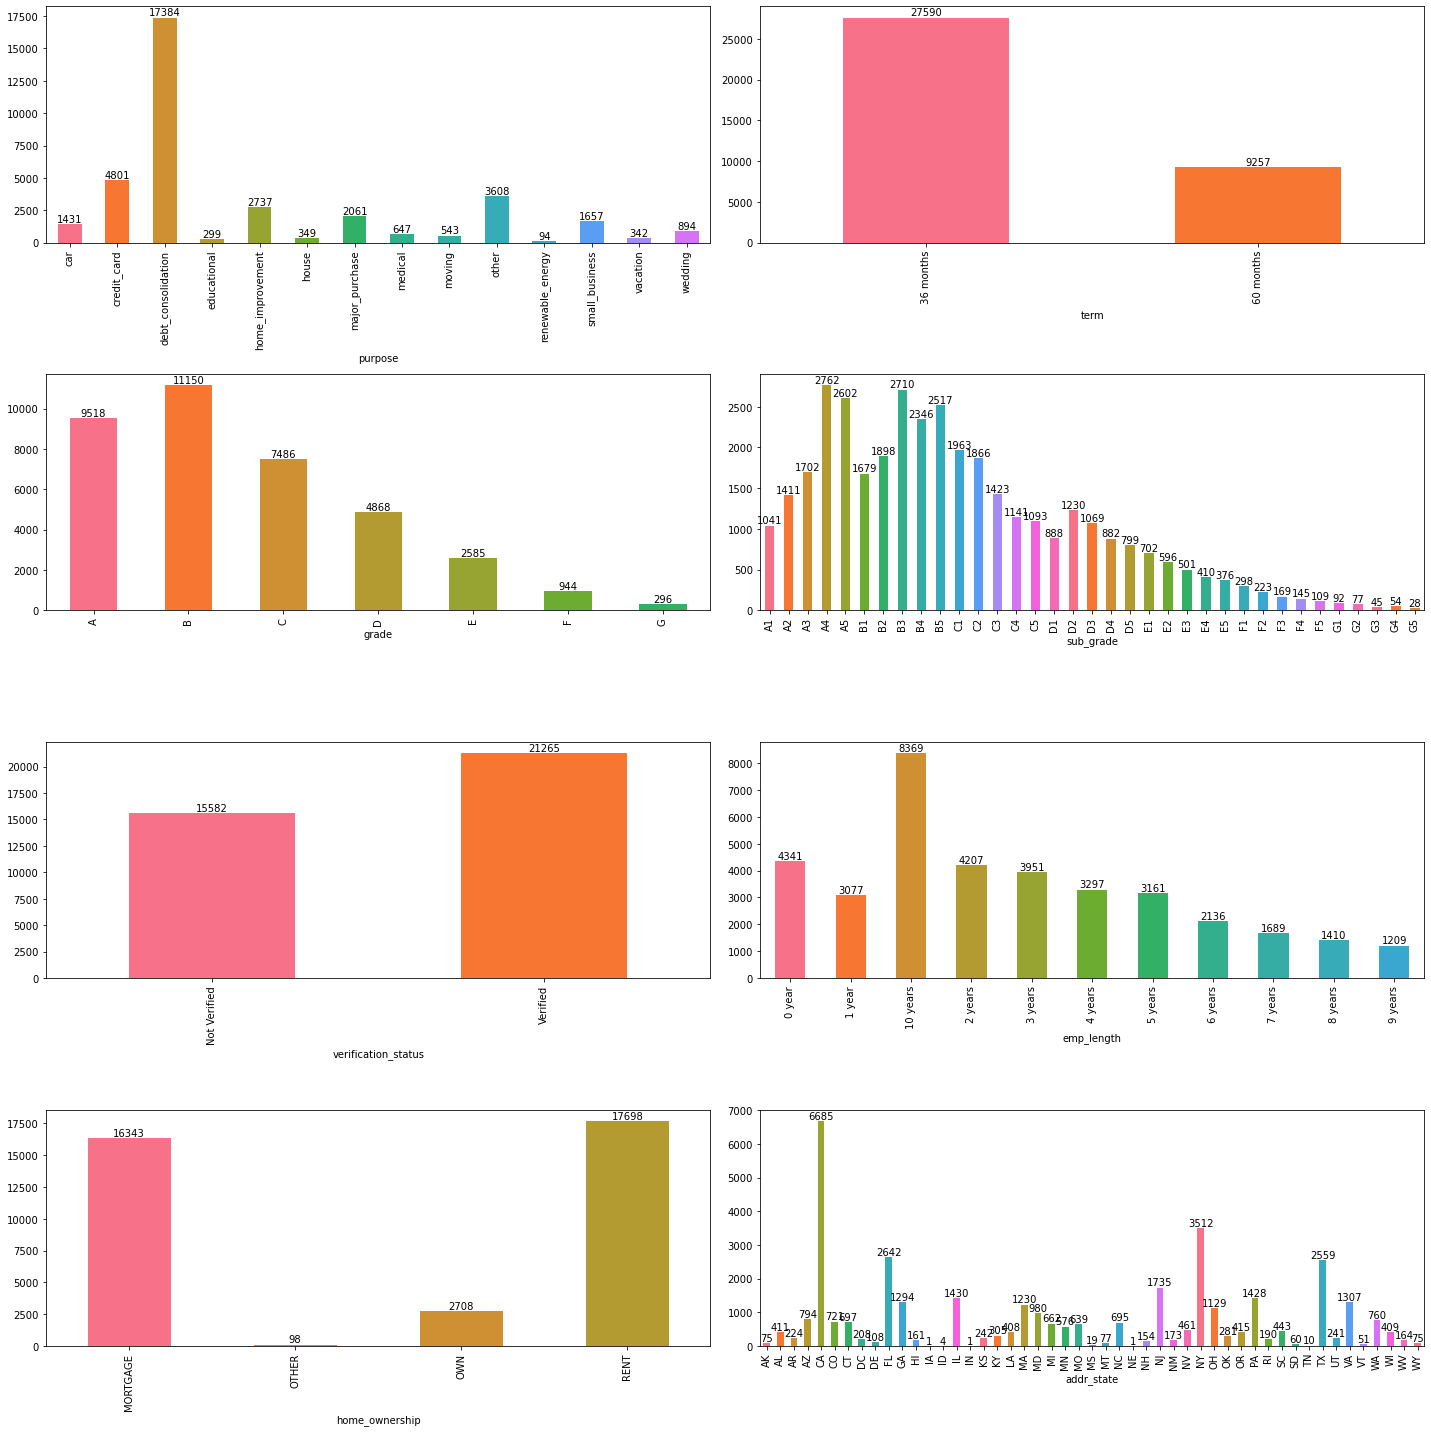

In [319]:
# plot the graph for all categorical_variables
plt.figure(figsize=(20,20))
categoricalBarPlots(processed_loan_df, ['purpose', 'term', 'grade','sub_grade',  'verification_status','emp_length','home_ownership','addr_state'])


Observations:

1. debt_consolidation is by far the largest 'purpose' for seeking a loan
2. Most loans are for 36 month term
3. Increase in default rate is observed from Grade A to Grade B  while a declining trend is observed from Grade C to Grade G.
4. Most loans are taken by people of employment length of 10 or more years
5. Most loans are taken by people who stays on rent
6. People of CA state takes highest number of loans

In [320]:
#Filtering data for default loans 
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']

In [321]:
charged_off_df.shape

(5281, 19)

### Bivariate Analysis Of Categorical Variables 

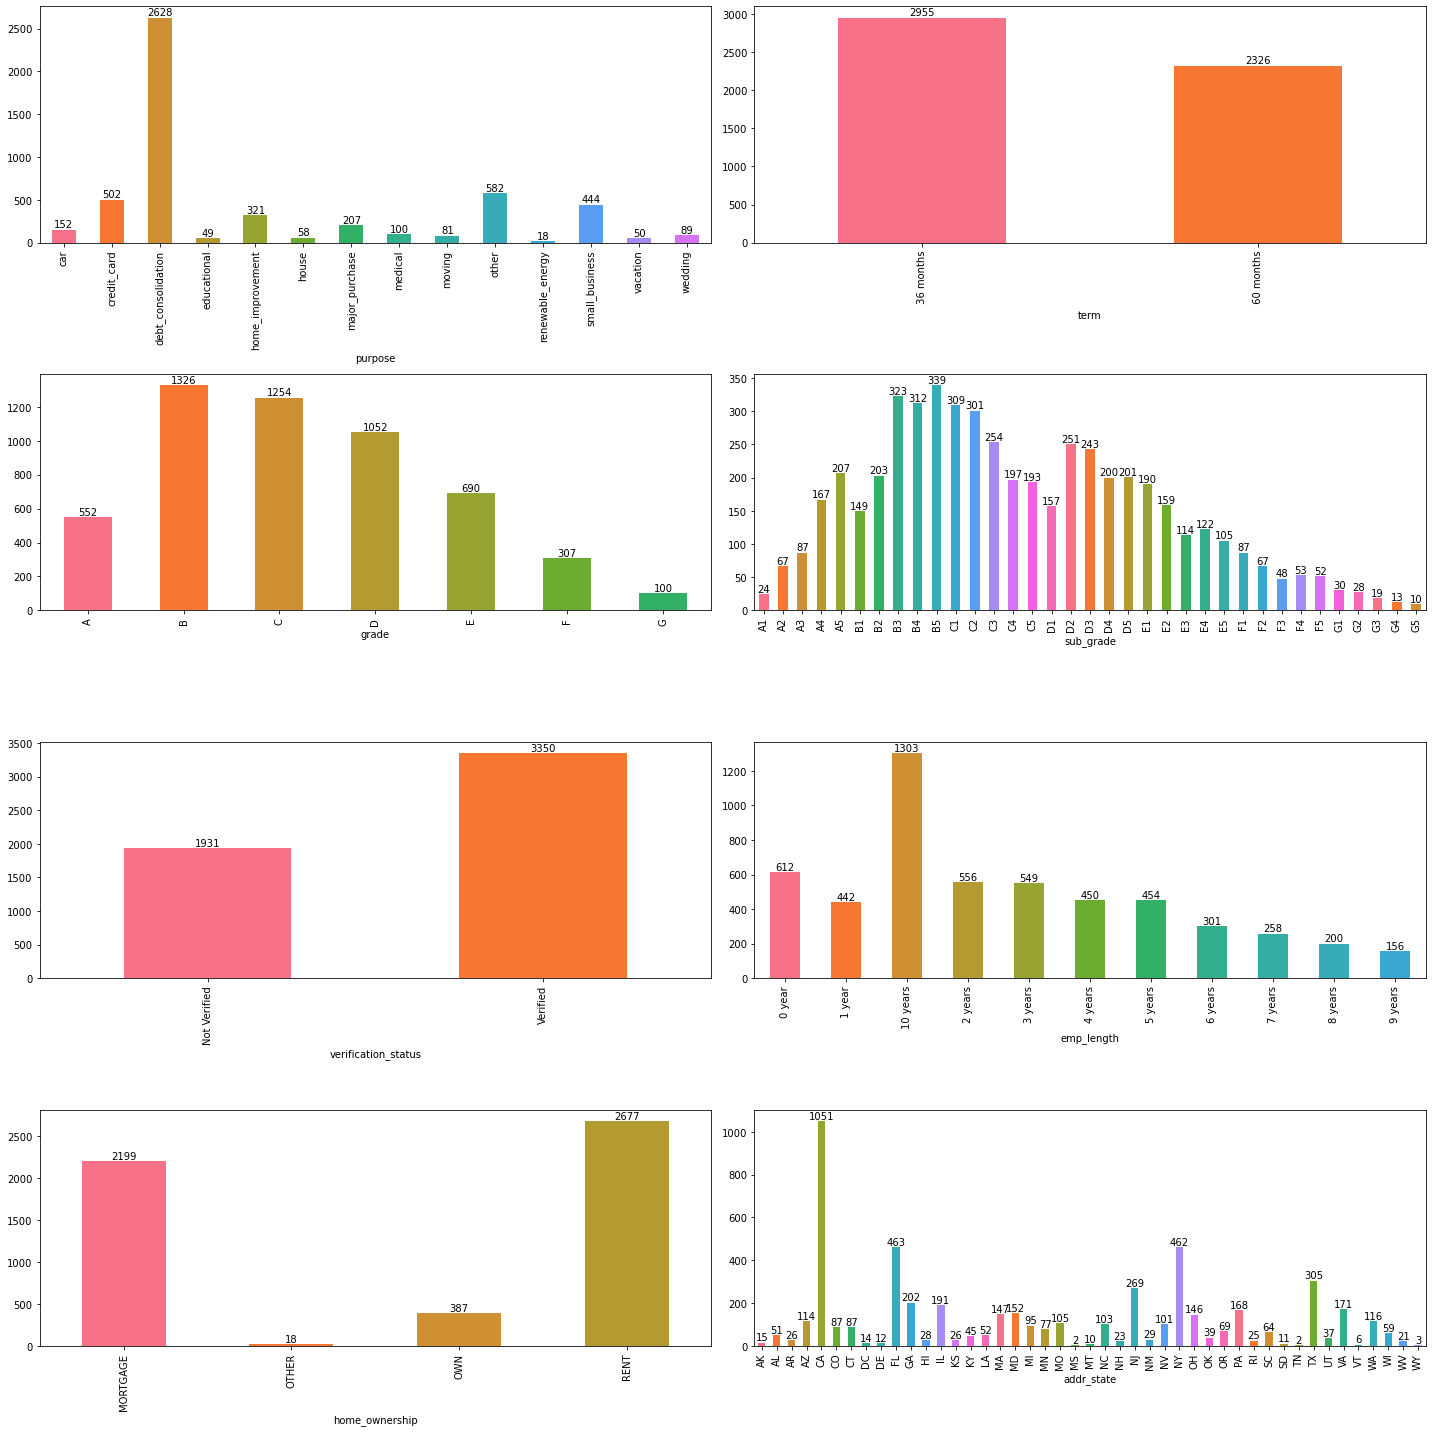

In [322]:
# plot the graph for all categorical_variables for loan_staus='Charged Off'
plt.figure(figsize=(20,20))
categoricalBarPlots(charged_off_df, ['purpose', 'term', 'grade','sub_grade',  'verification_status','emp_length','home_ownership','addr_state'])


Insights:

1. 50% of the “Charged off” loan was due to Debt consolidation.The lending company needs to exercise caution when approving loans for debt consolidation purposes, as it has maximum number of defaults.
2. 57%  “Charged off” was due to Short-term loans with a duration of 36 months. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.
3. Increase in default rate is observed from Grade A to Grade B  while a declining trend is observed from Grade C to Grade G.
4. Significant number of loan applicants who have been verified are defaulting than those not verified.
5. Applicants who had been employed for 10 years or more than 10 years accounted for the highest number of "Charged off". 
6. 50% of "Charged off" loan consumer lived in rented houses followed closed by mortgage houses.
7. California observes high default rate followed by Florida & New York. 

In [323]:
list(processed_loan_df)                    

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies']

###  Univariate & Bivariate Analysis of Numerical variables :
loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec,pub_rec_bankruptcies                                                                       

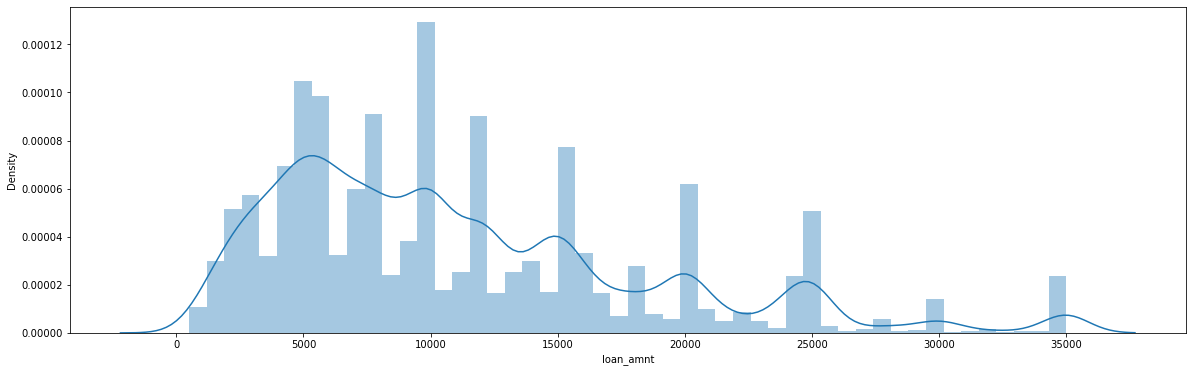

In [324]:
# loan amount: 
plt.figure(figsize=(20, 6))
sns.distplot(processed_loan_df['loan_amnt'])
plt.show()

In [325]:
processed_loan_df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Observation:
    
Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. 
Most of the loans granted are below 15000.

In [326]:
# Binning/ categorizing for loan amount
def loan_amount(n):
    if(n<5000):
        return '0-5K'
    elif(n>=5000 and n<10000):
        return '5k-10k'
    elif(n>=10000 and n<20000):
        return '10k-20k'
    elif(n>=20000 and n<25000):
        return '20k-25k'
    else:
        return 'very high'
        
processed_loan_df['loan_amnt_bins'] = processed_loan_df['loan_amnt'].apply(lambda x: loan_amount(x))

In [327]:
processed_loan_df[['loan_amnt', 'loan_amnt_bins']]

loan_amnt loan_amnt_bins
0           5000         5k-10k
1           2500           0-5K
2           2400           0-5K
3          10000        10k-20k
5           5000         5k-10k
6           7000         5k-10k
7           3000           0-5K
8           5600         5k-10k
9           5375         5k-10k
10          6500         5k-10k
11         12000        10k-20k
12          9000         5k-10k
13          3000           0-5K
14         10000        10k-20k
15          1000           0-5K
16         10000        10k-20k
17          3600           0-5K
18          6000         5k-10k
19          9200         5k-10k
20         20250        20k-25k
21         21000        20k-25k
22         10000        10k-20k
23         10000        10k-20k
24          6000         5k-10k
25         15000        10k-20k
26         15000        10k-20k
27          5000         5k-10k
28          4000           0-5K
29          8500         5k-10k
30          4375           0-5K
31         31825      very high
33          5000         5k-10k
34          7000         5k-10k
35         12400        10k-20k
36         10800        10k-20k
37         15000        10k-20k
38          6000         5k-10k
40          9600         5k-10k
41         12000        10k-20k
42          3000           0-5K
43          4400           0-5K
44          6000         5k-10k
45         14000        10k-20k
46          5000         5k-10k
47         10000        10k-20k
48         10000        10k-20k
49         11000        10k-20k
50         15000        10k-20k
51         25600      very high
52          7000         5k-10k
53         12000        10k-20k
54         12000        10k-20k
55         21000        20k-25k
56         16000        10k-20k
57         10000        10k-20k
58         10000        10k-20k
59          7100         5k-10k
60         13000        10k-20k
61         17500        10k-20k
62         17675        10k-20k
63          8000         5k-10k
64         10000        10k-20k
65          3500           0-5K
66         12500        10k-20k
67         16425        10k-20k
68          8200         5k-10k
69         15000        10k-20k
70         20975        20k-25k
71          6400         5k-10k
72          3000           0-5K
73         12000        10k-20k
74         14400        10k-20k
75         12000        10k-20k
76         11000        10k-20k
77          7250         5k-10k
78         15000        10k-20k
79         18000        10k-20k
80         35000      very high
81         10000        10k-20k
82         11800        10k-20k
83          4500           0-5K
84          7000         5k-10k
85          9200         5k-10k
87          4500           0-5K
88         12000        10k-20k
89         12000        10k-20k
90         12000        10k-20k
91          7000         5k-10k
92          8200         5k-10k
93         10500        10k-20k
94          7000         5k-10k
96         20000        20k-25k
97         17500        10k-20k
98          3500           0-5K
100         6200         5k-10k
102         6000         5k-10k
103         7200         5k-10k
104         9500         5k-10k
105        18825        10k-20k
106        24000        20k-25k
107         6000         5k-10k
108         6000         5k-10k
109         2100           0-5K
110         5500         5k-10k
111        11000        10k-20k
112        26800      very high
113         8000         5k-10k
114        10000        10k-20k
115         8000         5k-10k
116        10000        10k-20k
117        12000        10k-20k
118        10000        10k-20k
119        12000        10k-20k
120        25000      very high
121        19750        10k-20k
122        10000        10k-20k
123        13650        10k-20k
124        28000      very high
125        18000        10k-20k
126         2500           0-5K
127        21000        20k-25k
128        35000      very high
129        10000        10k-20k
130         7000         5k-10k
131    

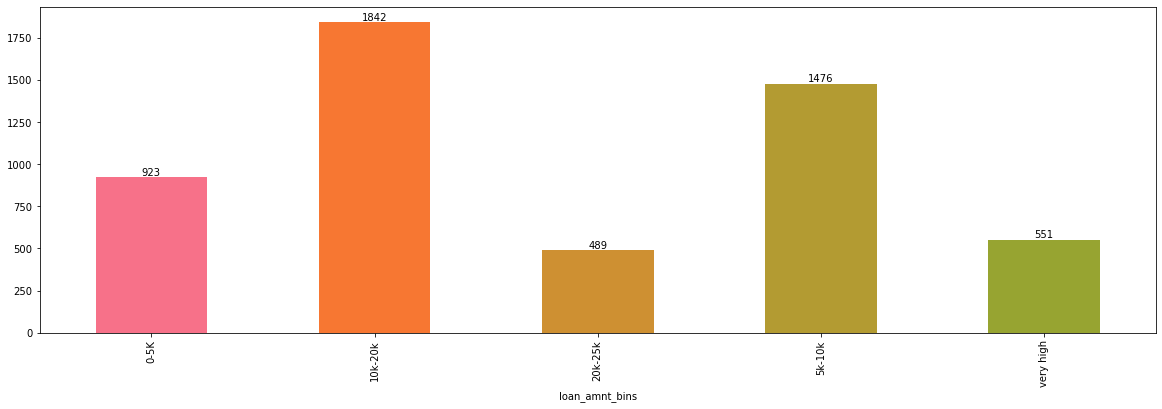

In [328]:
# plot the graph with default rates across loan amount type based on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('loan_amnt_bins').loan_amnt_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

Observation :Consumers who take loan in the range of 10k to 20k default most    

In [329]:
#Annual Income
processed_loan_df['annual_inc'].describe()

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

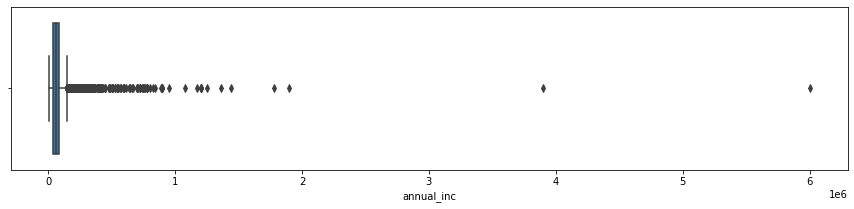

In [335]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=processed_loan_df['annual_inc'], data=processed_loan_df)

Observation

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.
There are outliers in the annual income column.
Median annual income is around 60,000

In [336]:
#Outlier Treatment
#Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = processed_loan_df[np.abs(processed_loan_df.annual_inc-processed_loan_df.annual_inc.mean()) <= (3*processed_loan_df.annual_inc.std())]


In [337]:
#Info after outlier removal
df.annual_inc.describe()

count     36579.000000
mean      66469.078771
std       36336.306073
min        4000.000000
25%       41000.000000
50%       59500.000000
75%       82000.000000
max      260735.000000
Name: annual_inc, dtype: float64

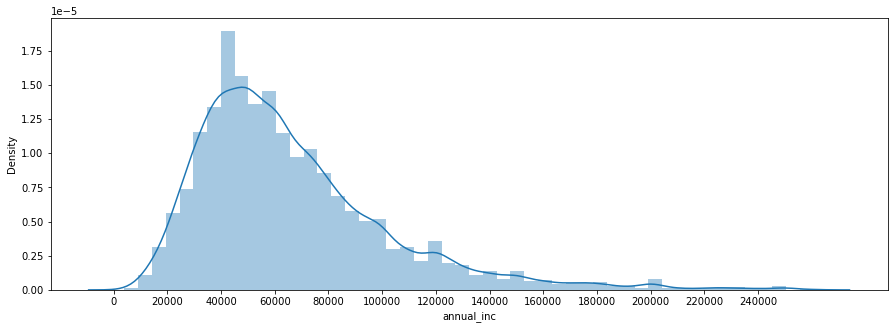

In [338]:
#Distribution plot of annula income
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

Observation:

40000 seems to be a good bin size for creating bins 

In [347]:
# annual income bins creation
def annual_income(n):
    if n <= 20000:
        return '0-20k'
    elif n > 20000 and n <=40000:
        return '20k-40k'
    elif n > 40000 and n <=60000:
        return '40k-60k'
    elif n > 60000 and n <=80000:
        return '60k-80k'
    elif n > 80000 and n <=100000:
        return '80k-100k'
    elif n > 100000 and n <=120000:
        return '100k-120k'
    else:
        return 'very high'

processed_loan_df['annual_inc_bins'] = processed_loan_df['annual_inc'].apply(lambda x: annual_income(x))

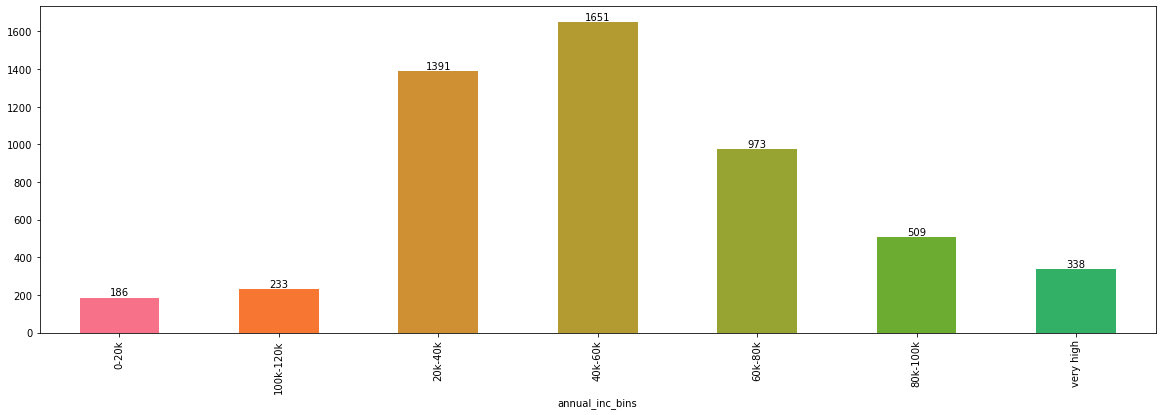

In [350]:
# plot the graph with default rates across annual income type based on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('annual_inc_bins').annual_inc_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

Observation

Consumers with annual income 20k-60k defaults most

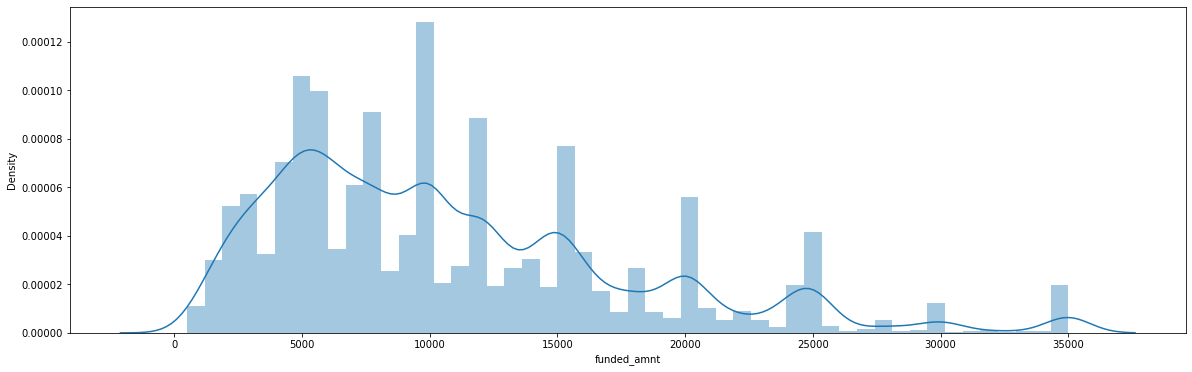

In [343]:
# Funded Amount: 
plt.figure(figsize=(20, 6))
sns.distplot(processed_loan_df['funded_amnt'])
plt.show()

In [344]:
#Data info
processed_loan_df.funded_amnt.describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [349]:
# funded amount bins creation
def funded_amnt(n):
    if(n<5000):
        return '0-5K'
    elif(n>=5000 and n<10000):
        return '5k-10k'
    elif(n>=10000 and n<20000):
        return '10k-20k'
    elif(n>=20000 and n<25000):
        return '20k-25k'
    else:
        return 'very high'

processed_loan_df['funded_amnt_bins'] = processed_loan_df['funded_amnt'].apply(lambda x: funded_amnt(x))

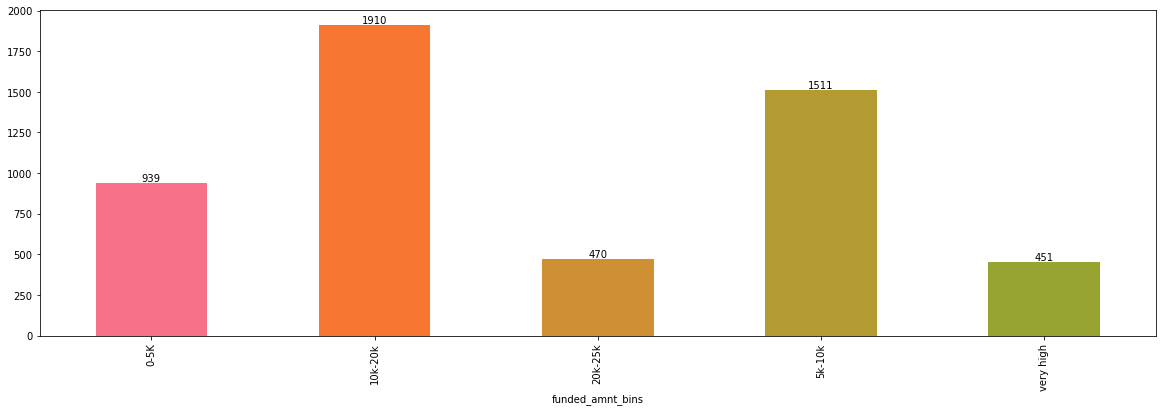

In [351]:
# plot the graph with default rates across funded_amnt based on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('funded_amnt_bins').funded_amnt_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

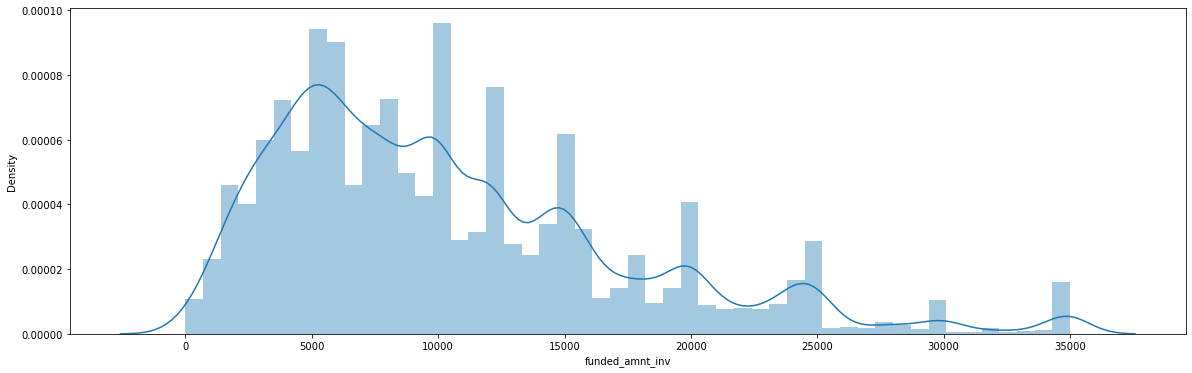

In [352]:
# Funded Amount Inv: 
plt.figure(figsize=(20, 6))
sns.distplot(processed_loan_df['funded_amnt_inv'])
plt.show()

In [353]:
#Data info
processed_loan_df.funded_amnt_inv.describe()

count    36847.000000
mean     10430.400856
std       7008.919431
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.044685
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [354]:
# funded amount bins creation
def funded_amnt_inv(n):
    if(n<5000):
        return '0-5K'
    elif(n>=5000 and n<10000):
        return '5k-10k'
    elif(n>=10000 and n<20000):
        return '10k-20k'
    elif(n>=20000 and n<25000):
        return '20k-25k'
    else:
        return 'very high'

processed_loan_df['funded_amnt_inv_bins'] = processed_loan_df['funded_amnt_inv'].apply(lambda x: funded_amnt_inv(x))

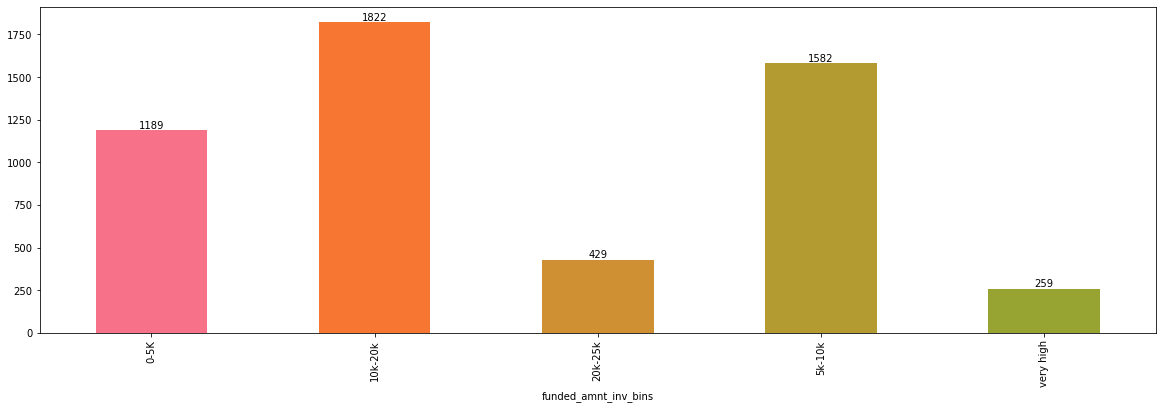

In [355]:
# plot the graph with default rates across funded_amnt_inv based on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('funded_amnt_inv_bins').funded_amnt_inv_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

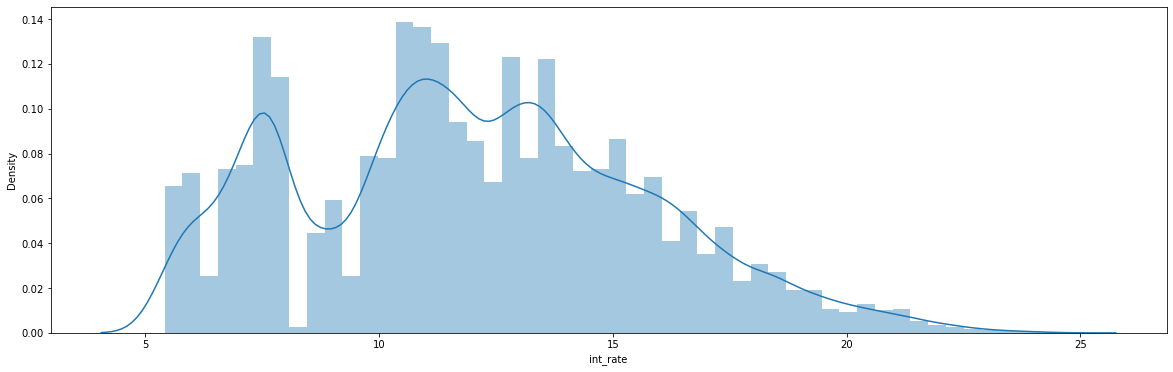

In [356]:
# Interest Rate : 
plt.figure(figsize=(20, 6))
sns.distplot(processed_loan_df['int_rate'])
plt.show()

In [357]:
#Data info
processed_loan_df.int_rate.describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

Interest rate ranges from 5% to 24%

In [359]:
# funded amount bins creation
def interest_rate(n):
    if(n<5):
        return '0-5%'
    elif(n>=5 and n<10):
        return '5%-10%'
    elif(n>=10 and n<15):
        return '10%-15%'
    elif(n>=15 and n<20):
        return '15%-20%'
    else:
        return 'very high'

processed_loan_df['interest_rate_bins'] = processed_loan_df['int_rate'].apply(lambda x: interest_rate(x))

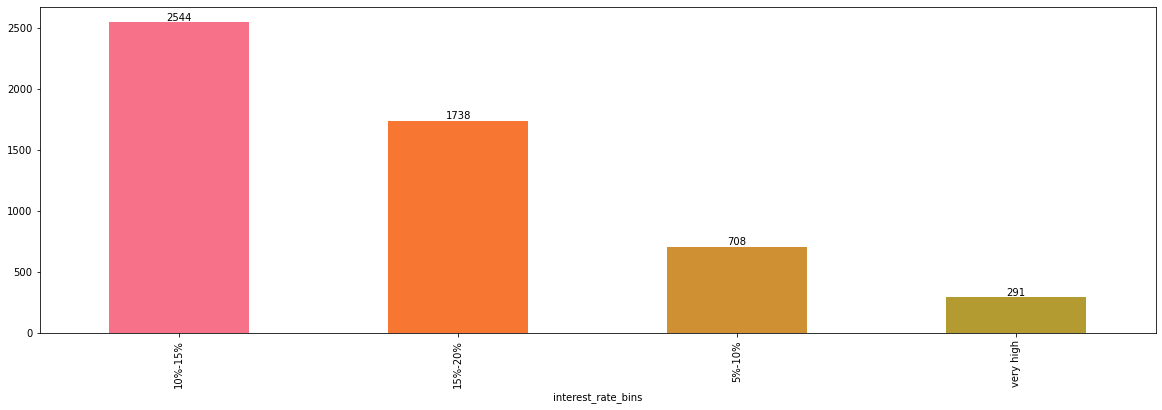

In [364]:
# plot the graph with default rates across interest rates on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('interest_rate_bins').interest_rate_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

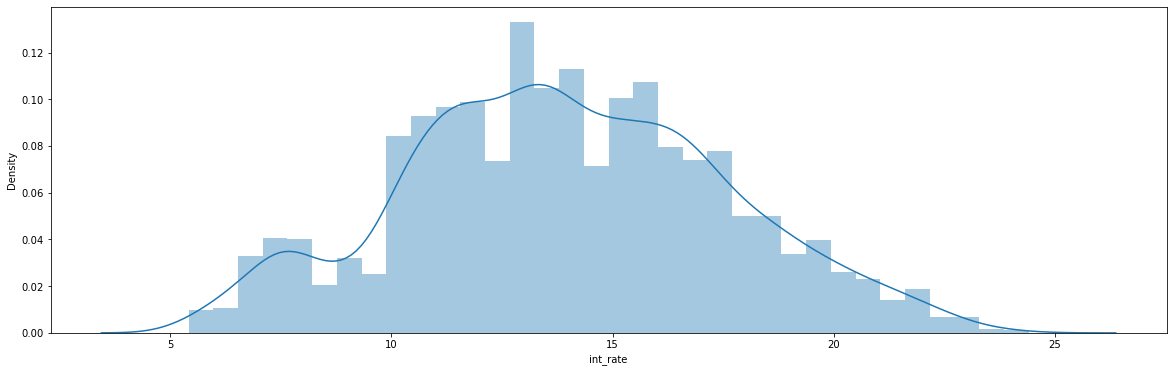

In [362]:
plt.figure(figsize=(20, 6))
sns.distplot(charged_off_df['int_rate'])
plt.show()

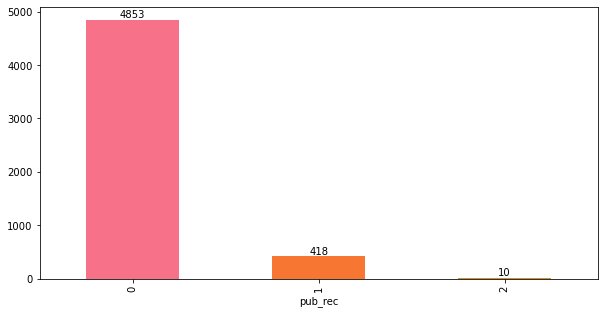

In [371]:
# Number of derogatory public records
plt.figure(figsize=(10,5))
ax = charged_off_df.groupby('pub_rec').loan_status.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

Observation

92% of the defaulters dont have derogatory public records while 8% consumers have derogatory public records and they default which is obvious

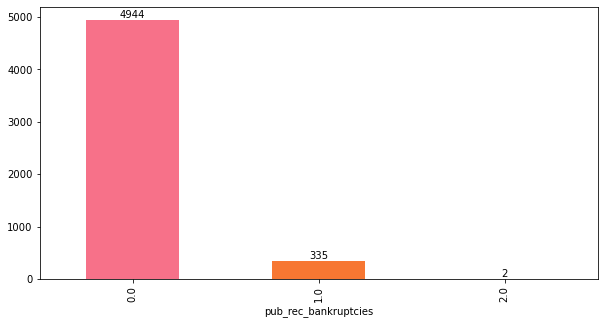

In [372]:
# Number of public record bankruptcies
plt.figure(figsize=(10,5))
ax = charged_off_df.groupby('pub_rec_bankruptcies').loan_status.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

Observation

95% of the consumers dont have public record bankruptcies still they default while 6% consumers have dpublic record bankruptcies and they default which is obvious

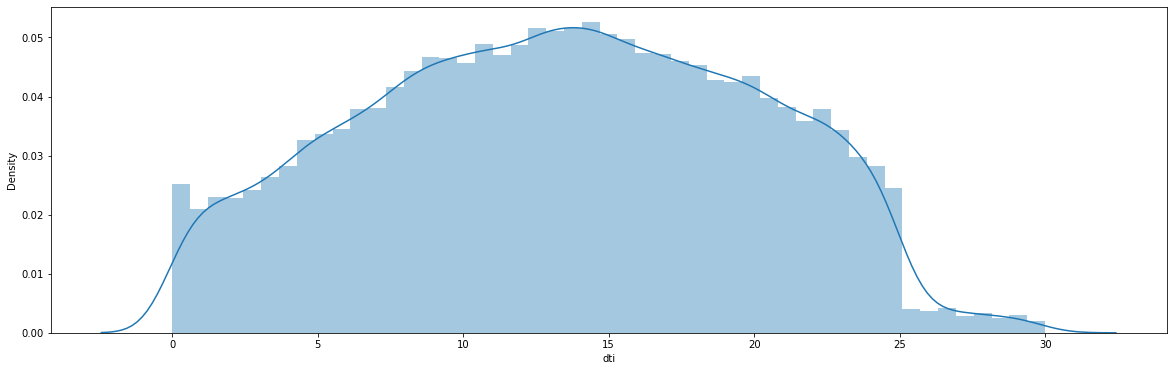

In [375]:
# Dti: 
plt.figure(figsize=(20, 6))
sns.distplot(processed_loan_df['dti'])
plt.show()

In [376]:
#Data info
processed_loan_df.dti.describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [377]:
# dti bins creation
def dti(n):
    if(n<5):
        return '0-5'
    elif(n>=5 and n<10):
        return '5-10'
    elif(n>=10 and n<15):
        return '10-15'
    elif(n>=15 and n<20):
        return '15-20'
    elif(n>=20 and n<25):
        return '20-25'
    else:
        return '25-30'

processed_loan_df['dti_bins'] = processed_loan_df['dti'].apply(lambda x: dti(x))

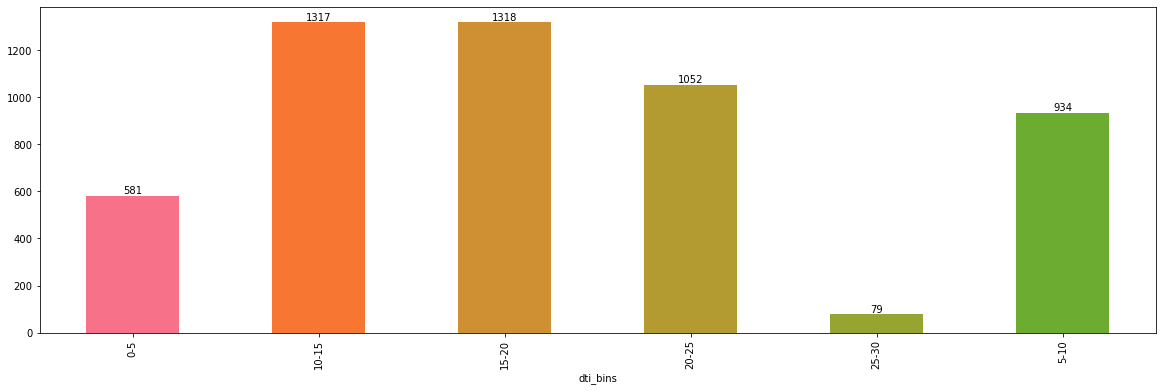

In [378]:
# plot the graph with default rates across dti on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('dti_bins').dti_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

Observation

Consumers having Dti in the range of 10-20% are highest defaulters

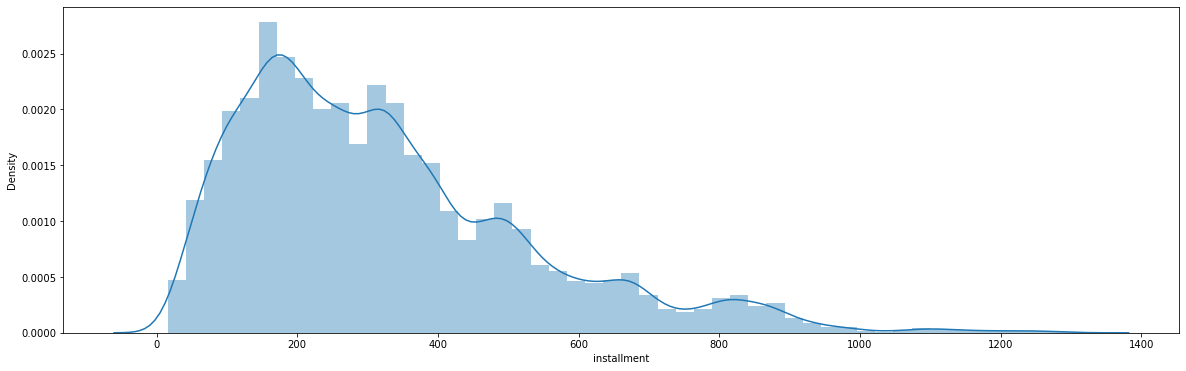

In [379]:
#Installment
plt.figure(figsize=(20, 6))
sns.distplot(processed_loan_df['installment'])
plt.show()

In [380]:
#Data info
processed_loan_df.installment.describe()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

In [383]:
# installment bins creation
def installment(n):
    if(n<200):
        return '0-200'
    elif(n>=200 and n<400):
        return '200-400'
    elif(n>=400 and n<600):
        return '400-600'
    elif(n>=600 and n<800):
        return '600-800'
    elif(n>=800 and n<1000):
        return '800-1000'
    else:
        return '>1000'

processed_loan_df['installment_bins'] = processed_loan_df['installment'].apply(lambda x: installment(x))

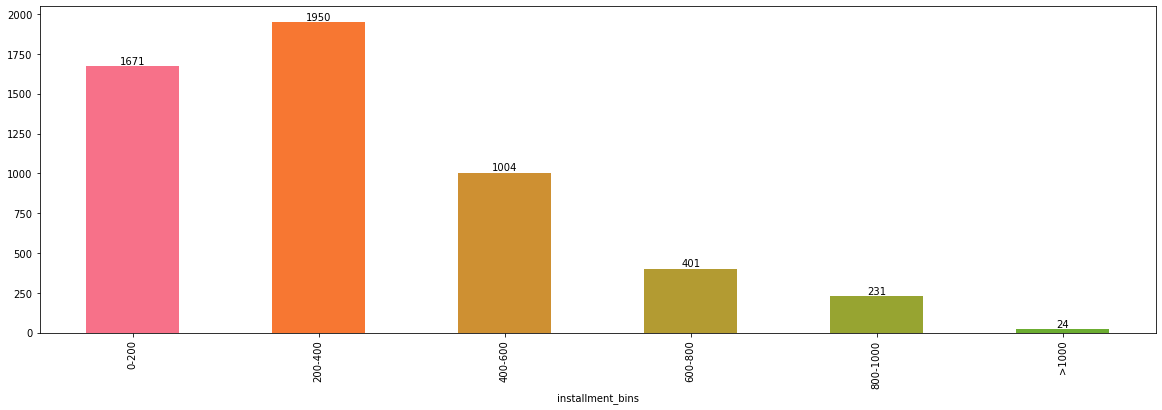

In [384]:
# plot the graph with default rates across installment on bins created
charged_off_df = processed_loan_df[processed_loan_df.loan_status == 'Charged Off']
charged_off_df = charged_off_df.reset_index(drop=True)
plt.figure(figsize=(20,6))
ax = charged_off_df.groupby('installment_bins').installment_bins.count().plot.bar(color=sns.color_palette('husl', 16))
ax.bar_label(ax.containers[0])
plt.show()

Observation:

Loan Charged-off for installemnt range between 200-400 the most followed by installment less than 200

### Multivariate Analysis

In [386]:
correlation_df = processed_loan_df.copy()

##### Analysis using Loan amount, Grade and Term

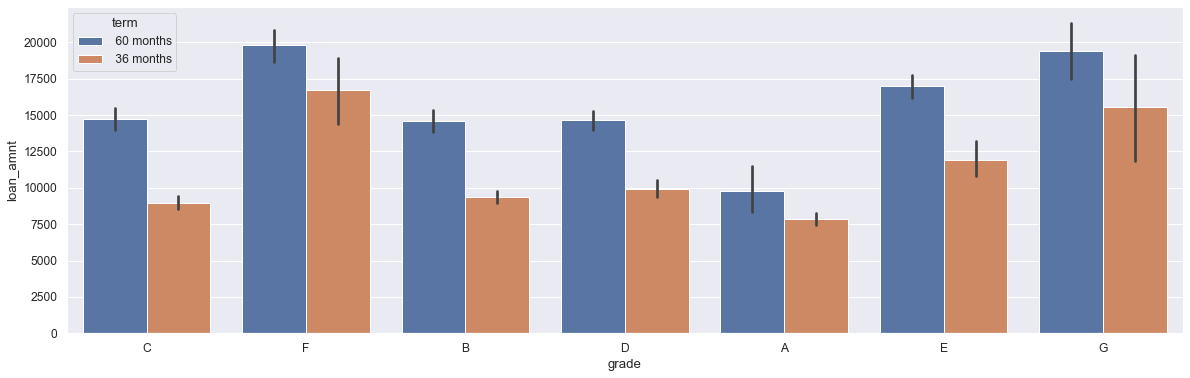

In [392]:
plt.figure(figsize=(20, 6))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=charged_off_df, estimator=np.mean)
plt.show()

Observation:
Higher loan amount are associated with lower grade for longer terms for Charged_off loan status

##### Analysis using Loan amount, Loan_status and Term

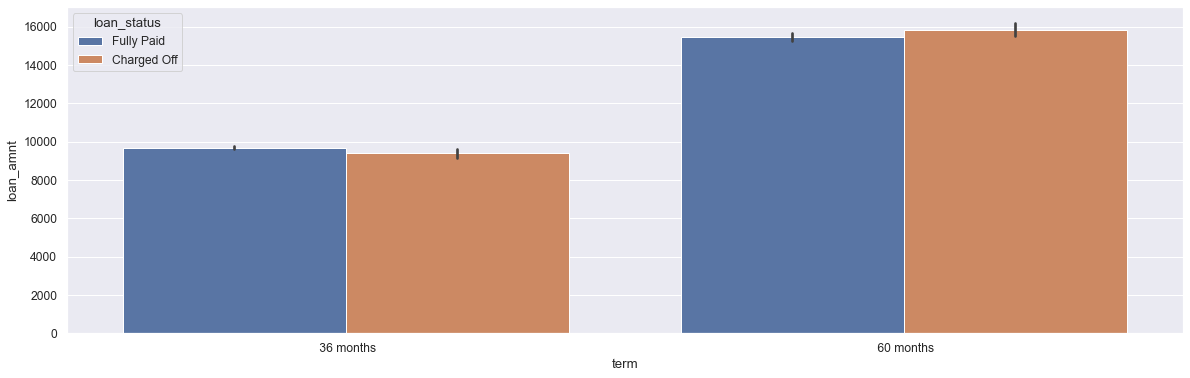

In [393]:
plt.figure(figsize=(20, 6))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=processed_loan_df, estimator=np.mean)
plt.show()

Observation: Higher loan amount are associated with longer terms and see higher Charge Offs.

##### Analysis of Interest Rate and Sub Grade for Loan_status = Charged_off

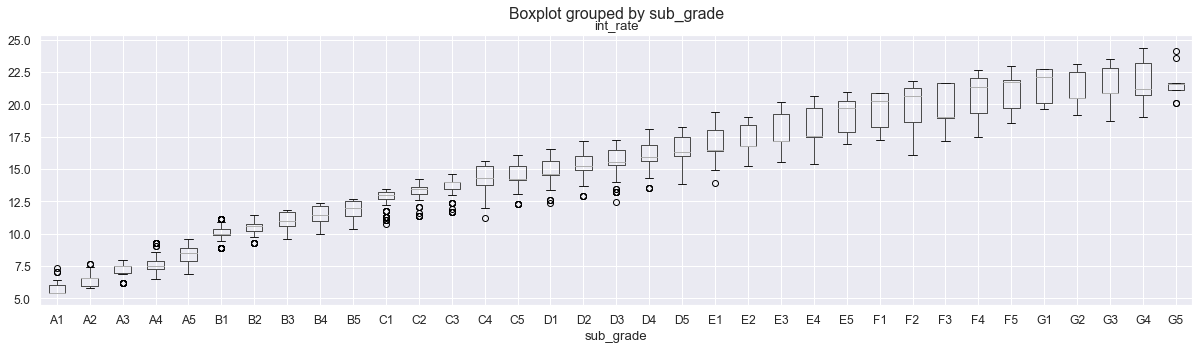

In [396]:
charged_off_df.boxplot(column='int_rate', by='sub_grade',figsize=(20,5))
plt.show()

Observation :

Interest rates varies directly with the sub_grade.
Higher the interest rate lower the sub_grade for charged_off loan status
           

##### Analysis of Interest Rate and Loan_status

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

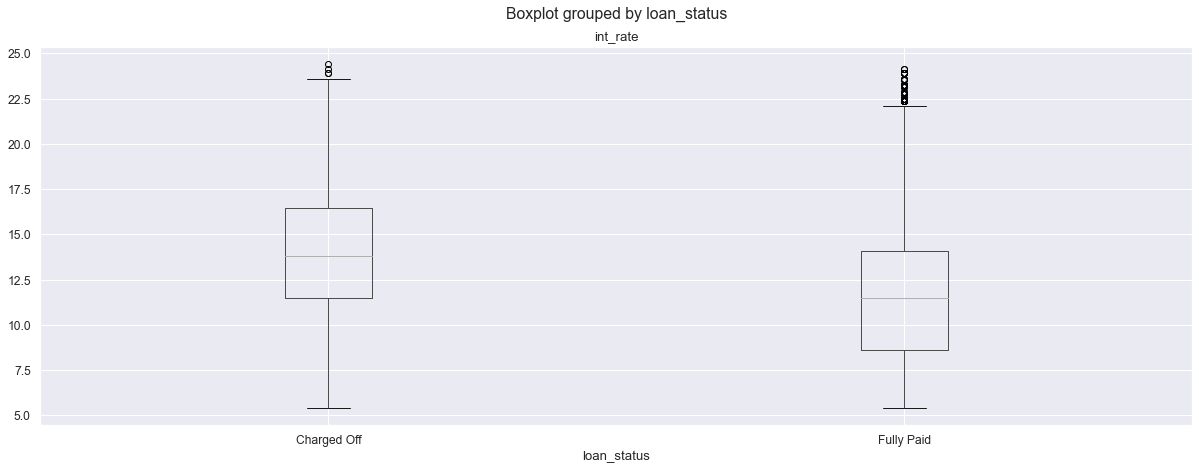

In [398]:
processed_loan_df.boxplot(column='int_rate', by='loan_status',figsize=(20,7))

Observation: Loans at a higher intrest rate are more likely to be Charged Off.

##### Analysis of Interest Rate and term for Loan_status = Charged_off

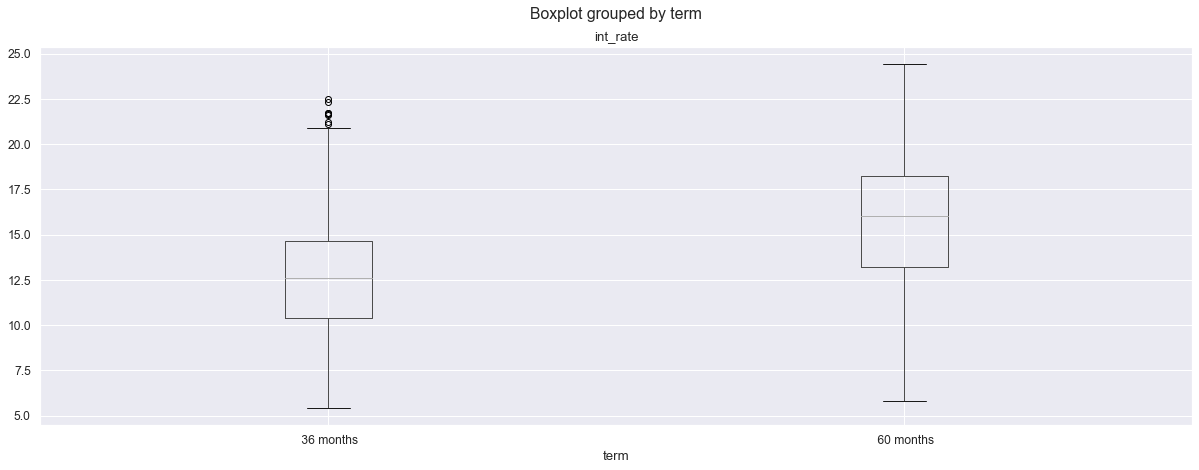

In [400]:
charged_off_df.boxplot(column='int_rate', by='term',figsize=(20,7))
plt.show()

Observation: Larger interest rate were given for higher term for Charged_off loan status

##### Analysis of loan_amnt, verification_status, loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

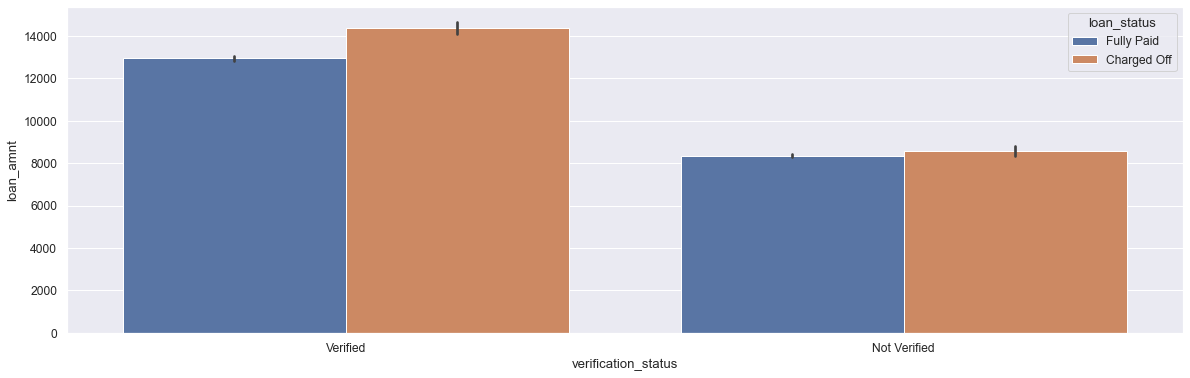

In [402]:
plt.figure(figsize=(20, 6))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=processed_loan_df, estimator=np.mean)

Observation:
    
Higher loan amounts are Verified more often and also higher loan amounts charges off most.
This, explains why higher loan amounts are verified most

###### Insights:

1.  50% of the “Charged off” loan was due to Debt consolidation.The lending company needs to exercise caution when approving loans for debt consolidation purposes, as it has maximum number of defaults.

2.   57%  “Charged off” was due to Short-term loans with a duration of 36 months. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.

3. Increase in default rate is observed from Grade A to Grade B  while a declining trend is observed from Grade C to Grade G.

4.  Significant number of loan applicants who have been verified are defaulting than those not verified.Higher loan amounts are  Verified more often and also higher loan amounts charges off most. This, explains why higher loan amounts are verified most.

5. Applicants who had been employed for 10 years or more than 10 years accounted for the highest number of "Charged off".

6. 50% of "Charged off" loan consumer lived in rented houses followed closed by mortgage houses.So before granting loans background check for consumers who stay in rented & mortaged homes need to be verified thoroughly

7. California observes high default rate followed by Florida & New York.

8. The borrowers who are in lower income groups have maximum tendency to default the loan and it generally decreases with the increase in the annual income.

9. The tendency to default the loan is increasing with increase in the interest rate.